In [84]:
import pandas as pd

# Eğitim dosyasını içe aktarma
train_file_path = "Ad_click_prediction_train (1).csv"
train_data = pd.read_csv(train_file_path)

# Veriyi inceleme
print(train_data.head())  # İlk birkaç satırı görüntüleme
print(train_data.info())  # Genel veri bilgisi

   session_id          DateTime  user_id product  campaign_id  webpage_id  \
0      140690  2017-07-02 00:00   858557       C       359520       13787   
1      333291  2017-07-02 00:00   243253       C       105960       11085   
2      129781  2017-07-02 00:00   243253       C       359520       13787   
3      464848  2017-07-02 00:00  1097446       I       359520       13787   
4       90569  2017-07-02 00:01   663656       C       405490       60305   

   product_category_1  product_category_2  user_group_id  gender  age_level  \
0                   4                 NaN           10.0  Female        4.0   
1                   5                 NaN            8.0  Female        2.0   
2                   4                 NaN            8.0  Female        2.0   
3                   3                 NaN            3.0    Male        3.0   
4                   3                 NaN            2.0    Male        2.0   

   user_depth  city_development_index  var_1  is_click  
0    

In [85]:
train_data

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463286,583588,2017-07-07 23:59,572718,H,118601,28529,5,82527.0,4.0,Male,4.0,3.0,2.0,0,0
463287,198389,2017-07-07 23:59,130461,I,118601,28529,4,82527.0,10.0,Female,4.0,3.0,2.0,1,0
463288,563423,2017-07-07 23:59,306241,D,118601,28529,4,82527.0,2.0,Male,2.0,3.0,NaN,0,0
463289,595571,2017-07-07 23:59,306241,D,118601,28529,5,82527.0,2.0,Male,2.0,3.0,NaN,0,0


In [86]:
# Her sütundaki boş (eksik) değerlerin sayısını kontrol etme
missing_values = train_data.isnull().sum()

# Boş veri içeren sütunları görüntüleme
print(missing_values[missing_values > 0])

# Toplam boş veri sayısını kontrol etme
print(f"Toplam boş değer sayısı: {train_data.isnull().sum().sum()}")

product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
dtype: int64
Toplam boş değer sayısı: 563955


In [87]:
# product_category_1'e göre gruplama ve her grup için en çok tekrar eden product_category_2 değerini bulma
most_frequent_category = train_data.groupby('product_category_1')['product_category_2'].agg(lambda x: x.mode()[0])

print(most_frequent_category)

product_category_1
1    146115.0
2    254132.0
3    254132.0
4     82527.0
5    270915.0
Name: product_category_2, dtype: float64


In [88]:
import pandas as pd

# Eşleme sözlüğü (Mapping dictionary)
category_mapping = {
    1: 146115.0,
    2: 254132.0,
    3: 254132.0,
    4: 82527.0,
    5: 270915.0
}

# product_category_2'yi, product_category_1'e göre eşleme ile doldurma
train_data['product_category_2'] = train_data['product_category_1'].map(category_mapping)

print(train_data)


        session_id          DateTime  user_id product  campaign_id  \
0           140690  2017-07-02 00:00   858557       C       359520   
1           333291  2017-07-02 00:00   243253       C       105960   
2           129781  2017-07-02 00:00   243253       C       359520   
3           464848  2017-07-02 00:00  1097446       I       359520   
4            90569  2017-07-02 00:01   663656       C       405490   
...            ...               ...      ...     ...          ...   
463286      583588  2017-07-07 23:59   572718       H       118601   
463287      198389  2017-07-07 23:59   130461       I       118601   
463288      563423  2017-07-07 23:59   306241       D       118601   
463289      595571  2017-07-07 23:59   306241       D       118601   
463290       45023  2017-07-07 23:59  1113780       C       405490   

        webpage_id  product_category_1  product_category_2  user_group_id  \
0            13787                   4             82527.0           10.0   
1    

In [89]:
# Her sütundaki boş (eksik) değerlerin sayısını kontrol etme
missing_values = train_data.isnull().sum()

# Boş veri içeren sütunları görüntüleme
print(missing_values[missing_values > 0])

# Toplam boş veri sayısını kontrol etme
print(f"Toplam boş değer sayısı: {train_data.isnull().sum().sum()}")

user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
dtype: int64
Toplam boş değer sayısı: 198101


C:\Users\Fallrytme\AppData\Local\Temp\ipykernel_11684\124201876.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


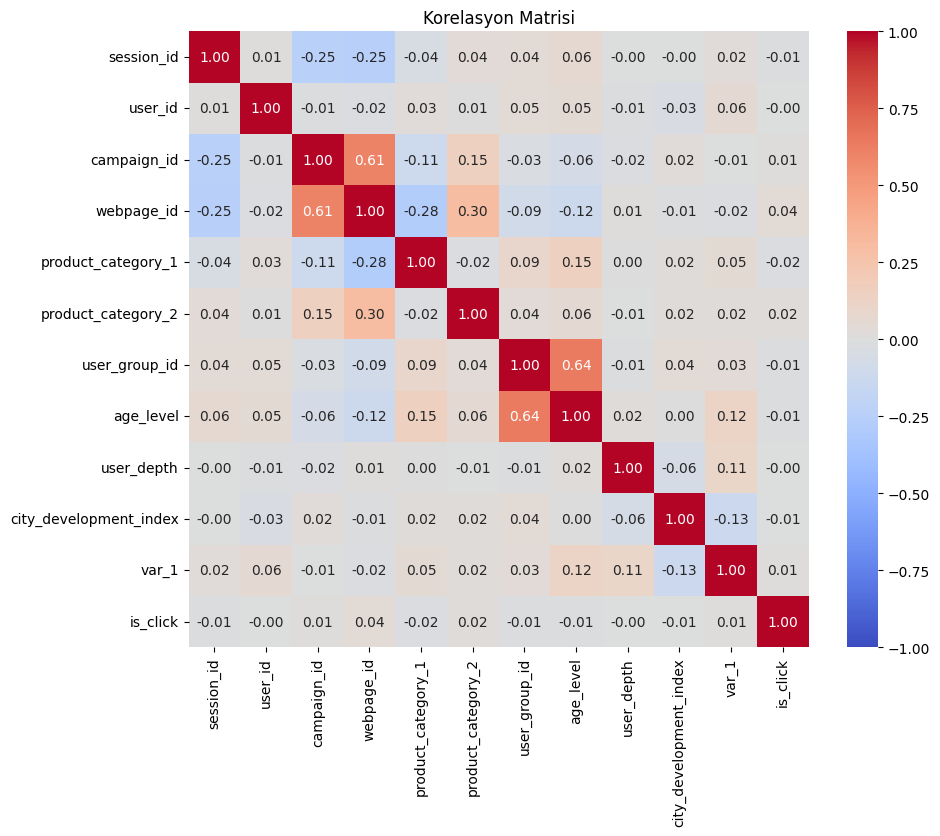

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini hesaplayalım
correlation_matrix = train_data.corr()

# Korelasyon matrisini görselleştirelim
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Korelasyon Matrisi')
plt.show()

In [91]:
# city_development_index sütununda NaN olan satırları silme
train_data = train_data.dropna(subset=['city_development_index'])

In [92]:
# Her sütundaki boş (eksik) değerlerin sayısını kontrol etme
missing_values = train_data.isnull().sum()

# Boş veri içeren sütunları görüntüleme
print(missing_values[missing_values > 0])

# Toplam boş veri sayısını kontrol etme
print(f"Toplam boş değer sayısı: {train_data.isnull().sum().sum()}")

Series([], dtype: int64)
Toplam boş değer sayısı: 0


In [93]:
# train_data'daki sütunları listeleyelim
print(train_data.columns)

Index(['session_id', 'DateTime', 'user_id', 'product', 'campaign_id',
       'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'gender', 'age_level', 'user_depth',
       'city_development_index', 'var_1', 'is_click'],
      dtype='object')


In [94]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# 1. DateTime sütununu sayısal verilere dönüştürme
train_data['DateTime'] = pd.to_datetime(train_data['DateTime'])
train_data['year'] = train_data['DateTime'].dt.year
train_data['month'] = train_data['DateTime'].dt.month
train_data['day'] = train_data['DateTime'].dt.day
train_data['hour'] = train_data['DateTime'].dt.hour
train_data['minute'] = train_data['DateTime'].dt.minute

# 'DateTime' sütununu kaldırıyoruz çünkü artık sayısal verilere dönüştürdük
train_data.drop(columns=['DateTime'], inplace=True)

# 2. 'product' sütununu kategorik veriye dönüştürme
label_encoder = LabelEncoder()
train_data['product'] = label_encoder.fit_transform(train_data['product'].astype(str))

# 3. Bağımsız ve hedef değişkenleri ayıralım
X = train_data.drop(columns=['is_click'])
y = train_data['is_click']

# 4. Kategorik sütunları sayısal verilere dönüştürme (Label Encoding)
categorical_cols = ['gender', 'age_level', 'user_depth', 'product_category_1', 'product_category_2', 'user_group_id']
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# 5. Veriyi eğitim ve test setlerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. XGBoost modelini oluşturma ve eğitme
model = xgb.XGBClassifier(eval_metric='mlogloss')
model.fit(X_train, y_train)

# 7. Test verisiyle tahminler yapma
y_pred = model.predict(X_test)

# 8. Modelin doğruluğunu değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print(f"Model doğruluğu: {accuracy:.4f}")


C:\Users\Fallrytme\AppData\Local\Temp\ipykernel_11684\1761933031.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['DateTime'] = pd.to_datetime(train_data['DateTime'])
C:\Users\Fallrytme\AppData\Local\Temp\ipykernel_11684\1761933031.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['year'] = train_data['DateTime'].dt.year
C:\Users\Fallrytme\AppData\Local\Temp\ipykernel_11684\1761933031.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Model doğruluğu: 0.9336


In [95]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# 1. Test verisini yükleyin
test_file_path = "Ad_Click_prediciton_test.csv"
test_data = pd.read_csv(test_file_path)

# 2. Test verisini aynı şekilde işleyeceğiz (DateTime, product vb.)
# DateTime sütununu sayısal verilere dönüştürme
test_data['DateTime'] = pd.to_datetime(test_data['DateTime'])
test_data['year'] = test_data['DateTime'].dt.year
test_data['month'] = test_data['DateTime'].dt.month
test_data['day'] = test_data['DateTime'].dt.day
test_data['hour'] = test_data['DateTime'].dt.hour
test_data['minute'] = test_data['DateTime'].dt.minute

# 'DateTime' sütununu kaldırıyoruz
test_data.drop(columns=['DateTime'], inplace=True)

# 'product' sütununu kategorik veriye dönüştürme
label_encoder = LabelEncoder()
test_data['product'] = label_encoder.fit_transform(test_data['product'].astype(str))

# Kategorik sütunları sayısal verilere dönüştürme
categorical_cols = ['gender', 'age_level', 'user_depth', 'product_category_1', 'product_category_2', 'user_group_id']
for col in categorical_cols:
    test_data[col] = label_encoder.fit_transform(test_data[col].astype(str))

# 3. Bağımsız değişkenleri (X) ayıralım
# 'is_click' sütunu test setinde bulunmadığı için sadece bağımsız değişkenleri alıyoruz
X_test = test_data  # 'is_click' çıkarılmasına gerek yok

# 4. Tahmin yapalım
y_test_pred = model.predict(X_test)

# 5. Tahmin sonuçlarını DataFrame olarak gösterebiliriz
test_data['is_click_pred'] = y_test_pred

# Sonuçları inceleyelim
print(test_data[['session_id', 'is_click_pred']])  # 'session_id' ve tahmin edilen 'is_click' değerini göster

# Eğer isterseniz tahminleri bir dosyaya kaydedebilirsiniz
test_data[['session_id', 'is_click_pred']].to_csv('Ad_Click_prediction_results.csv', index=False)


        session_id  is_click_pred
0           411705              1
1           208263              0
2           239450              0
3           547761              0
4           574275              0
...            ...            ...
128853      215328              0
128854      282232              0
128855      140499              0
128856      531038              0
128857      349998              0

[128858 rows x 2 columns]


In [100]:
# is_click_pred sütunundaki 1 ve 0'ları sayalım
click_counts = test_data['is_click_pred'].value_counts()

# Sonuçları yazdıralım
print(click_counts)

0    128849
1         9
Name: is_click_pred, dtype: int64
